In [11]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [3]:
# q1
img = cv.imread('images/dog.jfif')

cv.imshow("original", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# q2 .1 
img = cv.imread('images/dog.jfif')
img_grayscale = cv.imread('images/dog.jfif', 0)

cv.imshow("original", img)
cv.imshow('grayscale', img_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

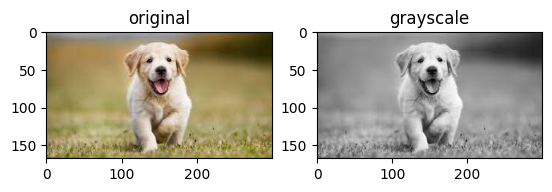

In [7]:
# q2 . 2
img = cv.imread('images/dog.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

imgg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(imgg, cmap='gray')
plt.title('grayscale')

plt.show()


In [10]:
input_video_path = 'videos/img_pexels.mp4'
output_video_path = 'smaller_img_pexels.mp4'
cap = cv.VideoCapture(input_video_path)

if not cap.isOpened():
    print("Error opening video file")

frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the size for the smaller frames
new_width = frame_width // 2
new_height = frame_height // 6

# Get the frame rate of the input video
fps = int(120)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # 'mp4v' is the codec for mp4 format
out = cv.VideoWriter(output_video_path, fourcc, fps, (new_width, new_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize the frame
    resized_frame = cv.resize(frame, (new_width, new_height))

    # Display the resulting frame
    cv.imshow('Frame', resized_frame)

    # Write the frame into the output file
    out.write(resized_frame)

    # Press Q on keyboard to exit early
    if cv.waitKey(1) & 0xFF == ord('1'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Closes all the frames
cv.destroyAllWindows()


# 

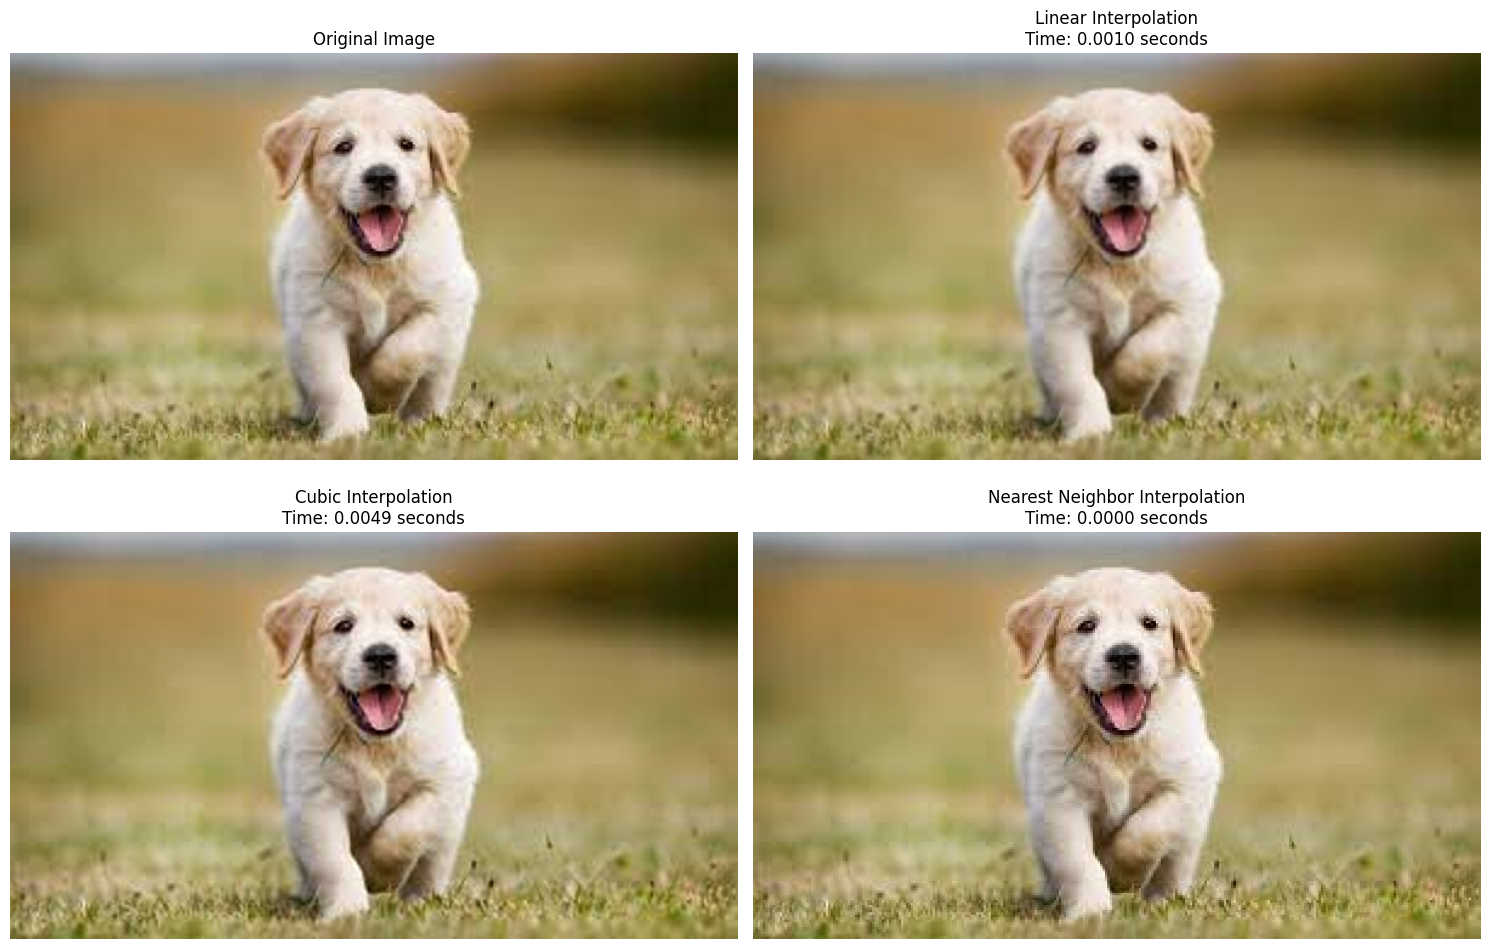

In [18]:
import cv2
import time
import matplotlib.pyplot as plt

# Load the image
image_path = 'images/dog.jfif'
image = cv2.imread(image_path)

# Define the new size for enlargement
scale_factor = 2
new_width = int(image.shape[1] * scale_factor)
new_height = int(image.shape[0] * scale_factor)
new_size = (new_width, new_height)

# Enlarge using Linear Interpolation
start_time = time.time()
linear_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
linear_time = time.time() - start_time

# Enlarge using Cubic Interpolation
start_time = time.time()
cubic_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
cubic_time = time.time() - start_time

# Enlarge using Nearest Neighbor Interpolation
start_time = time.time()
nearest_interpolated = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
nearest_time = time.time() - start_time

# Display the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(linear_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Linear Interpolation\nTime: {linear_time:.4f} seconds')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cubic_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Cubic Interpolation\nTime: {cubic_time:.4f} seconds')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(nearest_interpolated, cv2.COLOR_BGR2RGB))
plt.title(f'Nearest Neighbor Interpolation\nTime: {nearest_time:.4f} seconds')
plt.axis('off')

plt.tight_layout()
plt.show()
